In [224]:
%load_ext autoreload 
%autoreload 2
import cv2
import json, os, cv2
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import xarray as xr
import seaborn as sns
import h5py as hf
from tqdm import tqdm
from tqdm import tqdm
import itertools 
from scipy.interpolate import interp1d
from scipy import signal
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import os, fnmatch
from scipy.spatial.distance import cdist

import sys
sys.path.insert(0, 'C:/Users/nlab/Documents/GitHub/obstacle_avoidance')

from utils.base_functions import *
from src.utils.auxiliary import flatten_series
from src.utils.path import find
from src.base import BaseInput
from plots import plot_oa

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [225]:
session = plot_oa('D:/obstacle_avoidance/metadata/101222_101322_101422.json')
session.gather_session_df()
session.process_df()
df = session.df

In [65]:
session1 = plot_oa('D:/obstacle_avoidance/metadata/101222_101322_101422.json')
session1.gather_session_df()
session1.process_df()
df1 = session1.df

In [226]:
df.head()

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label,body_angle,head_angle,obstacle_edge_mid_x_cm,obstacle_edge_mid_y_cm,obstacle_intersect_spine_x,obstacle_intersect_spine_y
0,54988.262681,54994.300480,"[54988.265024, 54988.28183, 54988.298982, 5498...","[386, 387, 388, 389, 390, 391, 392, 393, 394, ...","[113.49581146240234, 113.18556213378906, 113.3...","[263.9523620605469, 264.298583984375, 264.3791...","[0.9999998807907104, 0.9999998807907104, 0.999...","[125.1736068725586, 125.01591491699219, 124.86...","[274.3076477050781, 274.1383056640625, 274.489...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,8,48.812807,19.999745,2,"[2.056199841276282, 2.1636553584871967, 2.2719...","[2.267923935501049, 2.476295062137352, 2.74473...",45.408217,19.490196,"[14.247214192878758, 16.51359800533714, 18.238...","[14.247214192878758, 16.51359800533714, 18.238..."
1,54994.300480,55007.392537,"[54994.317478, 54994.333721, 54994.350387, 549...","[[749, 750, 751, 752, 753, 754, 755, 756, 757,...","[569.2864990234375, 569.2193603515625, 568.796...","[258.95068359375, 258.351318359375, 258.500427...","[0.9951784610748291, 0.9959314465522766, 0.997...","[564.2037963867188, nan, nan, 563.220397949218...","[261.7225036621094, nan, nan, 259.137145996093...","[0.996788501739502, 0.9819933176040649, 0.9842...",...,8,48.812807,19.999745,2,"[2.0169549819959425, 1.930770722502407, 1.7555...","[0.8621379441739913, 0.8086110614086565, 0.727...",50.191820,19.558558,"[15.82705344679118, 17.7482680391108, 19.43558...","[15.82705344679118, 17.7482680391108, 19.43558..."
2,55007.392537,55010.653324,"[55007.405478, 55007.42176, 55007.438272, 5500...","[1534, 1535, 1536, 1537, 1538, 1539, 1540, 154...","[114.65208435058594, 114.07957458496094, 114.0...","[264.2535705566406, 264.05224609375, 263.75030...","[0.9999998807907104, 0.9999998807907104, 0.999...","[124.44671630859375, 124.2299575805664, 123.74...","[274.8415832519531, 275.1161193847656, 274.965...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0,36.830191,32.378658,7,"[2.0134085613327124, 2.029254373148421, 2.0727...","[2.2099719643965905, 2.1849744734335124, 2.235...",33.612869,31.812507,[],[]
3,55024.162995,55026.874713,"[55024.177804, 55024.193958, 55024.210739, 550...","[2540, 2541, 2542, 2543, 2544, 2545, 2546, 254...","[113.25594329833984, 113.1700668334961, 113.44...","[271.0632019042969, 271.4547119140625, 271.836...","[0.9999994039535522, 0.9999996423721313, 0.999...","[132.41876220703125, 132.4319610595703, 132.58...","[261.31451416015625, 261.38800048828125, 261.1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0,36.830191,32.378658,7,"[-1.7417119048528207, -1.8229928153727468, -1....","[-2.359364178196065, -2.4987411033535576, -2.4...",33.723324,31.977945,"[37.546448267420374, 35.394103896411494, 35.79...","[37.546448267420374, 35.394103896411494, 35.79..."
4,55026.874713,55030.753984,"[55026.87822, 55026.896179, 55026.911628, 5502...","[[2702, 2703, 2704, 2705, 2706, 2707, 2708, 27...","[569.4076538085938, 569.504150390625, 569.1824...","[258.5302734375, 258.6011962890625, 258.704528...","[0.9999992847442627, 0.9999994039535522, 0.999...","[559.6817016601562, 559.5265502929688, 559.330...","[246.50709533691406, 246.5774688720703, 246.78...","[0.9999991655349731, 0.9999991655349731, 0.999...",...,0,36.830191,32.378658,7,"[-1.4291948080591086, -0.7597974817160438, -0....","[-0.8326175667772752, -0.8229420208632297, -0....",38.519393,31.586167,"[37.77817286201343, 36.91199925335159, 36.9412...","[37.77817286201343, 36.91199925335159, 36.9412..."


In [4]:
df.columns.values

array(['first_poke', 'second_poke', 'trial_timestamps', 'trial_vidframes',
       'nose_x', 'nose_y', 'nose_likelihood', 'leftear_x', 'leftear_y',
       'leftear_likelihood', 'rightear_x', 'rightear_y',
       'rightear_likelihood', 'spine_x', 'spine_y', 'spine_likelihood',
       'midspine_x', 'midspine_y', 'midspine_likelihood', 'tailbase_x',
       'tailbase_y', 'tailbase_likelihood', 'midtail_x', 'midtail_y',
       'midtail_likelihood', 'tailend_x', 'tailend_y',
       'tailend_likelihood', 'arenaTL_x', 'arenaTL_y',
       'arenaTL_likelihood', 'arenaTR_x', 'arenaTR_y',
       'arenaTR_likelihood', 'arenaBL_x', 'arenaBL_y',
       'arenaBL_likelihood', 'arenaBR_x', 'arenaBR_y',
       'arenaBR_likelihood', 'obstacleTL_x', 'obstacleTL_y',
       'obstacleTL_likelihood', 'obstacleTR_x', 'obstacleTR_y',
       'obstacleTR_likelihood', 'obstacleBR_x', 'obstacleBR_y',
       'obstacleBR_likelihood', 'obstacleBL_x', 'obstacleBL_y',
       'obstacleBL_likelihood', 'leftportT_x', 'leftpo

In [84]:

#for ind,row in df.iterrows():
for clusters, cluster_name in enumerate(df['obstacle_cluster'].unique()):
    x=df.loc[df['obstacle_cluster']==cluster_name]
    mean_cenx = np.mean(x['gt_obstacle_cen_x_cm'])
    mean_ceny = np.mean(x['gt_obstacle_cen_y_cm'])
  
    for ind,row in df.iterrows(): 
        if row['obstacle_cluster'] == cluster_name:
            df.at[ind,'mean_gt_obstacle_cen_x_cm'] = mean_cenx
            df.at[ind,'mean_gt_obstacle_cen_y_cm'] = mean_ceny




In [83]:
#for ind,row in df.iterrows():
for clusters, cluster_name in enumerate(df1['obstacle_cluster'].unique()):
    x=df1.loc[df1['obstacle_cluster']==cluster_name]
    mean_cenx = np.mean(x['gt_obstacle_cen_x_cm'])
    mean_ceny = np.mean(x['gt_obstacle_cen_y_cm'])
  
    for ind,row in df1.iterrows(): 
        if row['obstacle_cluster'] == cluster_name:
            df1.at[ind,'mean_gt_obstacle_cen_x_cm'] = mean_cenx
            df1.at[ind,'mean_gt_obstacle_cen_y_cm'] = mean_ceny

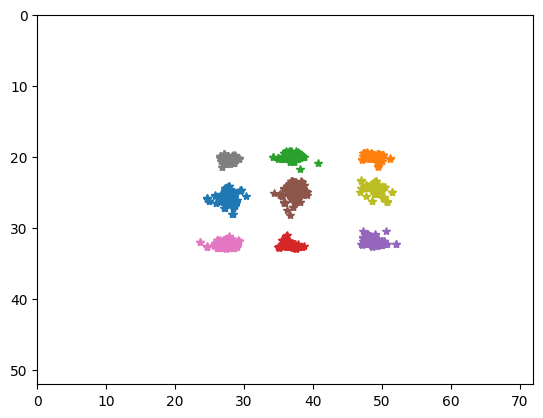

In [144]:
gt_label = df1['obstacle_cluster'].tolist()
#create obstacle_xypos array 
obstacle_xpos = np.array(df1.loc[:,'gt_obstacle_cen_x_cm'])
obstacle_ypos = np.array(df1.loc[:,'gt_obstacle_cen_y_cm'])
obstacle_xypos_ar = np.stack((obstacle_xpos, obstacle_ypos))
plt.figure()
for i in range(len(df1['obstacle_cluster'])):
    obstacle_xypos = obstacle_xypos_ar[:,i] 
    plt.plot(obstacle_xypos[0], obstacle_xypos[1], '*', color=list(mcolors.TABLEAU_COLORS)[gt_label[i]])
    plt.ylim([52,0]); plt.xlim([0, 72])

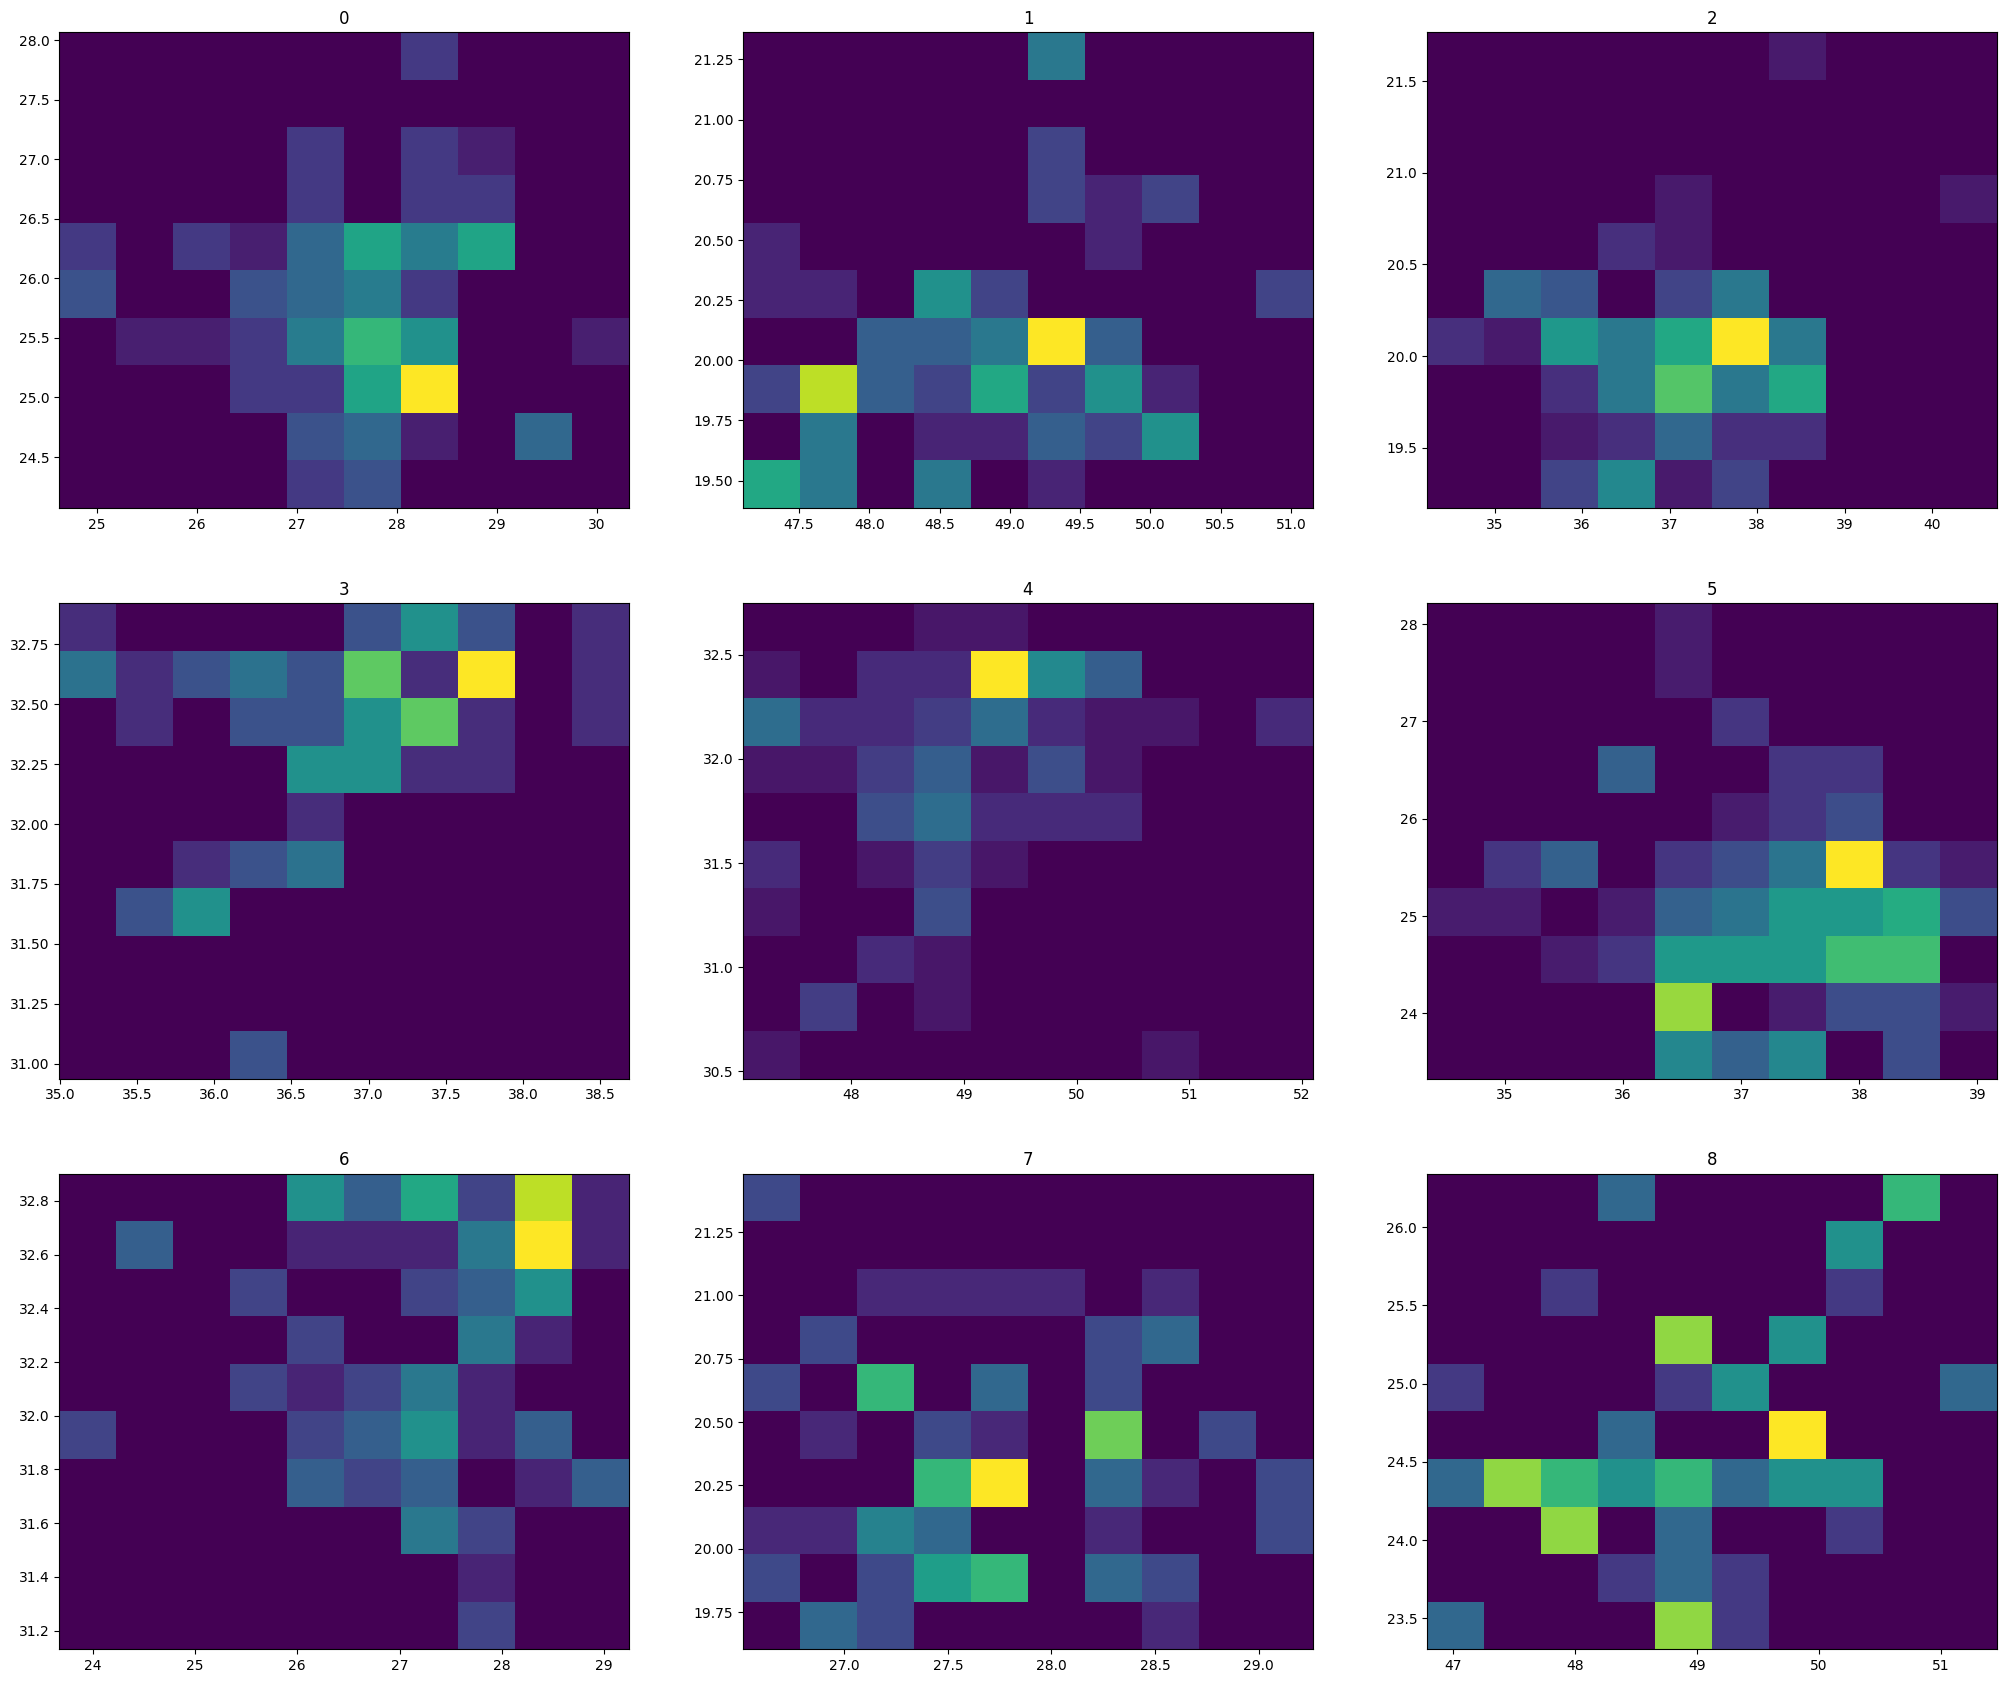

In [87]:
plt.subplots(3,3, figsize=(25,21))


for clusters, cluster_name in enumerate(df1['obstacle_cluster'].unique()):
    x=df1.loc[df1['obstacle_cluster']==cluster_name]
    plt.subplot(3,3,cluster_name+1)
    plt.gca().set_title(cluster_name)
    plt.hist2d(x['gt_obstacle_cen_x_cm'],x['gt_obstacle_cen_y_cm'])
    #plt.ylim([52,0]); plt.xlim([0, 72])

    

In [99]:
x['mean_gt_obstacle_cen_x_cm'].unique()

array([49.01269112])

In [142]:
len(df1)

1014

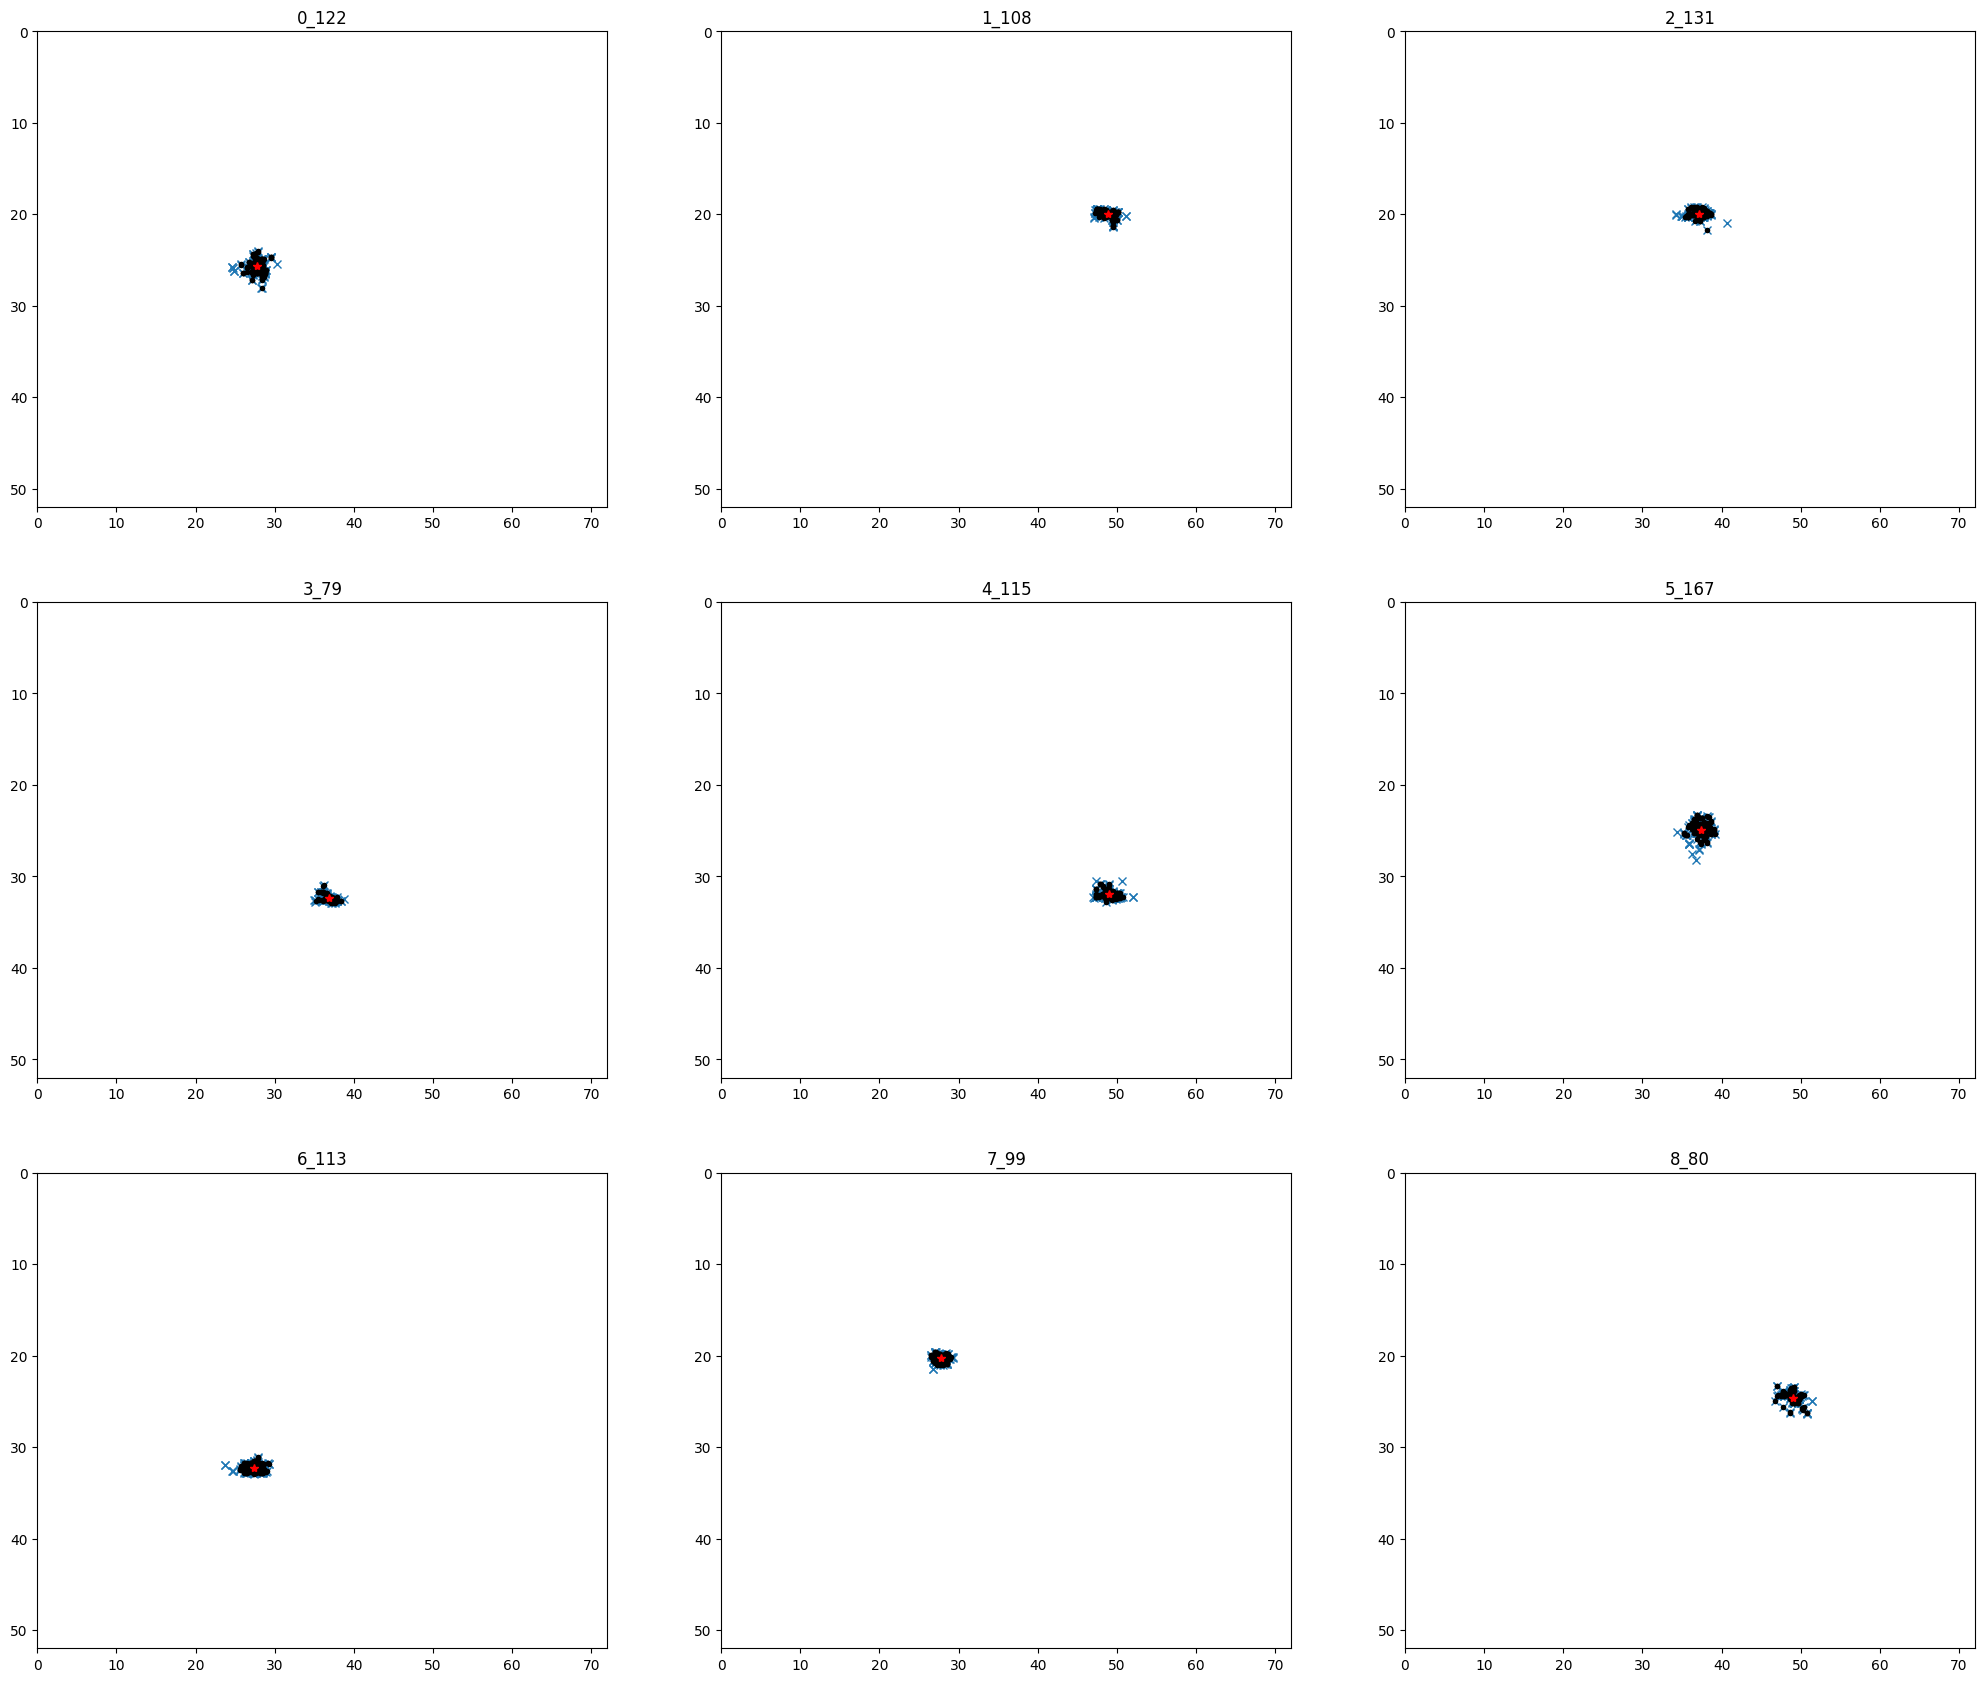

In [166]:
plt.subplots(3,3, figsize=(25,21))


for clusters, cluster_name in enumerate(df1['obstacle_cluster'].unique()):
    x=df1.loc[df1['obstacle_cluster']==cluster_name]
    plt.subplot(3,3,cluster_name+1)
    plt.gca().set_title(str(cluster_name)+'_' + str(len(x)))
    cluster_center = np.column_stack((x['mean_gt_obstacle_cen_x_cm'].unique(),x['mean_gt_obstacle_cen_y_cm'].unique()))
    cluster = np.column_stack((x['gt_obstacle_cen_x_cm'].to_numpy(),x['gt_obstacle_cen_y_cm'].to_numpy()))
    distances = cdist(cluster_center,cluster)
    plt.plot(x['gt_obstacle_cen_x_cm'],x['gt_obstacle_cen_y_cm'],'x')
    plt.plot(x['gt_obstacle_cen_x_cm'].iloc[np.where(distances<np.percentile(distances,95))[1]],x['gt_obstacle_cen_y_cm'].iloc[np.where(distances<np.percentile(distances,95))[1]],'.',color='black')
    plt.plot(x['mean_gt_obstacle_cen_x_cm'].unique(),x['mean_gt_obstacle_cen_y_cm'].unique(),'*',color = 'red')
    plt.ylim([52,0]); plt.xlim([0, 72])

In [170]:
for clusters, cluster_name in enumerate(df1['obstacle_cluster'].unique()):
    x=df1.loc[df1['obstacle_cluster']==cluster_name]
    cen_x_list = x['gt_obstacle_cen_x_cm'].sort_values()
    cen_x_list = cen_x_list.to_numpy()
    cen_y_list = x['gt_obstacle_cen_y_cm'].sort_values()
    cen_y_list = cen_y_list.to_numpy()
    cen_x_smallest,cen_x_largest,cen_y_smallest,cen_y_largest = cen_x_list[0],cen_x_list[-1],cen_y_list[0],cen_y_list[-1]
    print(cluster_name,cen_x_smallest,cen_x_largest,cen_y_smallest,cen_y_largest,x['mean_gt_obstacle_cen_x_cm'].unique(),x['mean_gt_obstacle_cen_y_cm'].unique())

1 47.10153827545068 51.15598067362944 19.386902039003104 21.36299006442639 [48.81280657] [19.99974508]
3 34.99528058841633 38.68741237003255 30.937326612118863 32.92257553927523 [36.83019089] [32.37865797]
5 34.33696422611072 39.16315460138148 23.33051936216178 28.21568031983405 [37.34964774] [24.88326251]
6 23.672283873362495 29.24383212681531 31.13010098995012 32.9010213861951 [27.38188085] [32.30187542]
0 24.622638543067332 30.32366857885396 24.072987056842724 28.06565031743722 [27.71827391] [25.68841177]
7 26.511267901536936 29.262555270323688 19.603003146893094 21.48005617413041 [27.72449373] [20.29664738]
8 46.78662583258851 51.45490492362184 23.30309610363196 26.340749658133035 [49.00200125] [24.61377785]
2 34.224618031842425 40.737819614353576 19.171765596431882 21.765871122032685 [37.09582875] [19.95374451]
4 47.0371762841755 52.09703145249776 30.463949607263373 32.749148951731954 [49.01269112] [31.97821]


In [ ]:
## get the geometric (top,left) postion of clusters 
# Find the outliers in each clusters x,y postion
def label_cluster(df):

In [196]:
df1['cluster_label'] = np.nan
for clusters, cluster_name in enumerate(df1['obstacle_cluster'].unique()):
    x=df1.loc[df1['obstacle_cluster']==cluster_name]
    cen_x_list = x['gt_obstacle_cen_x_cm'].sort_values()
    cen_x_list = cen_x_list.to_numpy()
    cen_y_list = x['gt_obstacle_cen_y_cm'].sort_values()
    cen_y_list = cen_y_list.to_numpy()
    cen_x_smallest,cen_x_largest,cen_y_smallest,cen_y_largest = cen_x_list[0],cen_x_list[-1],cen_y_list[0],cen_y_list[-1]
    #label cluster by obstacle post
    for ind,row in x.iterrows():
        # position top left label 0
        if 26.511267901536936 <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 29.262555270323688 and 19.603003146893094 <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 21.48005617413041:
            df1.at[ind,'cluster_label'] = 0
        # postion top middle lable 1     
        if 34.224618031842425  <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 40.737819614353576  and 19.171765596431882  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 21.765871122032685:
            df1.at[ind,'cluster_label'] = 1
        # postion top middle lable 2     
        if 47.10153827545068   <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 51.15598067362944  and 19.386902039003104  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 21.36299006442639:
            df1.at[ind,'cluster_label'] = 2
        # postion top middle lable 3     
        if 24.622638543067332    <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 30.32366857885396   and 24.072987056842724  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 28.06565031743722:
            df1.at[ind,'cluster_label'] = 3 
        # postion top middle lable 4     
        if 34.33696422611072     <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 39.16315460138148   and 23.33051936216178  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 28.21568031983405:
            df1.at[ind,'cluster_label'] = 4
        # postion top middle lable 5     
        if 46.78662583258851     <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 51.45490492362184   and 23.30309610363196  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 26.340749658133035:
            df1.at[ind,'cluster_label'] = 5
        # postion top middle lable 6     
        if 23.672283873362495      <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 29.24383212681531  and 31.13010098995012  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 32.9010213861951:
            df1.at[ind,'cluster_label'] = 6
        # postion top middle lable 7     
        if 34.99528058841633      <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 38.68741237003255   and 30.937326612118863  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 32.92257553927523:
            df1.at[ind,'cluster_label'] = 7
        # postion top middle lable 8     
        if 47.0371762841755 <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 52.09703145249776    and 30.463949607263373  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 32.749148951731954:
            df1.at[ind,'cluster_label'] = 8

        
                  
            

In [182]:
print(x['mean_gt_obstacle_cen_x_cm'].unique(),x['mean_gt_obstacle_cen_y_cm'].unique())

[49.01269112] [31.97821]


In [198]:
df1['cluster_label'].unique()

array([2., 7., 4., 6., 3., 0., 5., 1., 8.])

In [183]:
30.463949607263373  <= x['mean_gt_obstacle_cen_y_cm'].unique() <= 32.749148951731954

array([ True])

In [184]:
47.0371762841755 <= x['mean_gt_obstacle_cen_x_cm'].unique() <= 52.09703145249776 

array([ True])

In [185]:
int(7)

7

In [202]:
int(cluster_name)+1

3

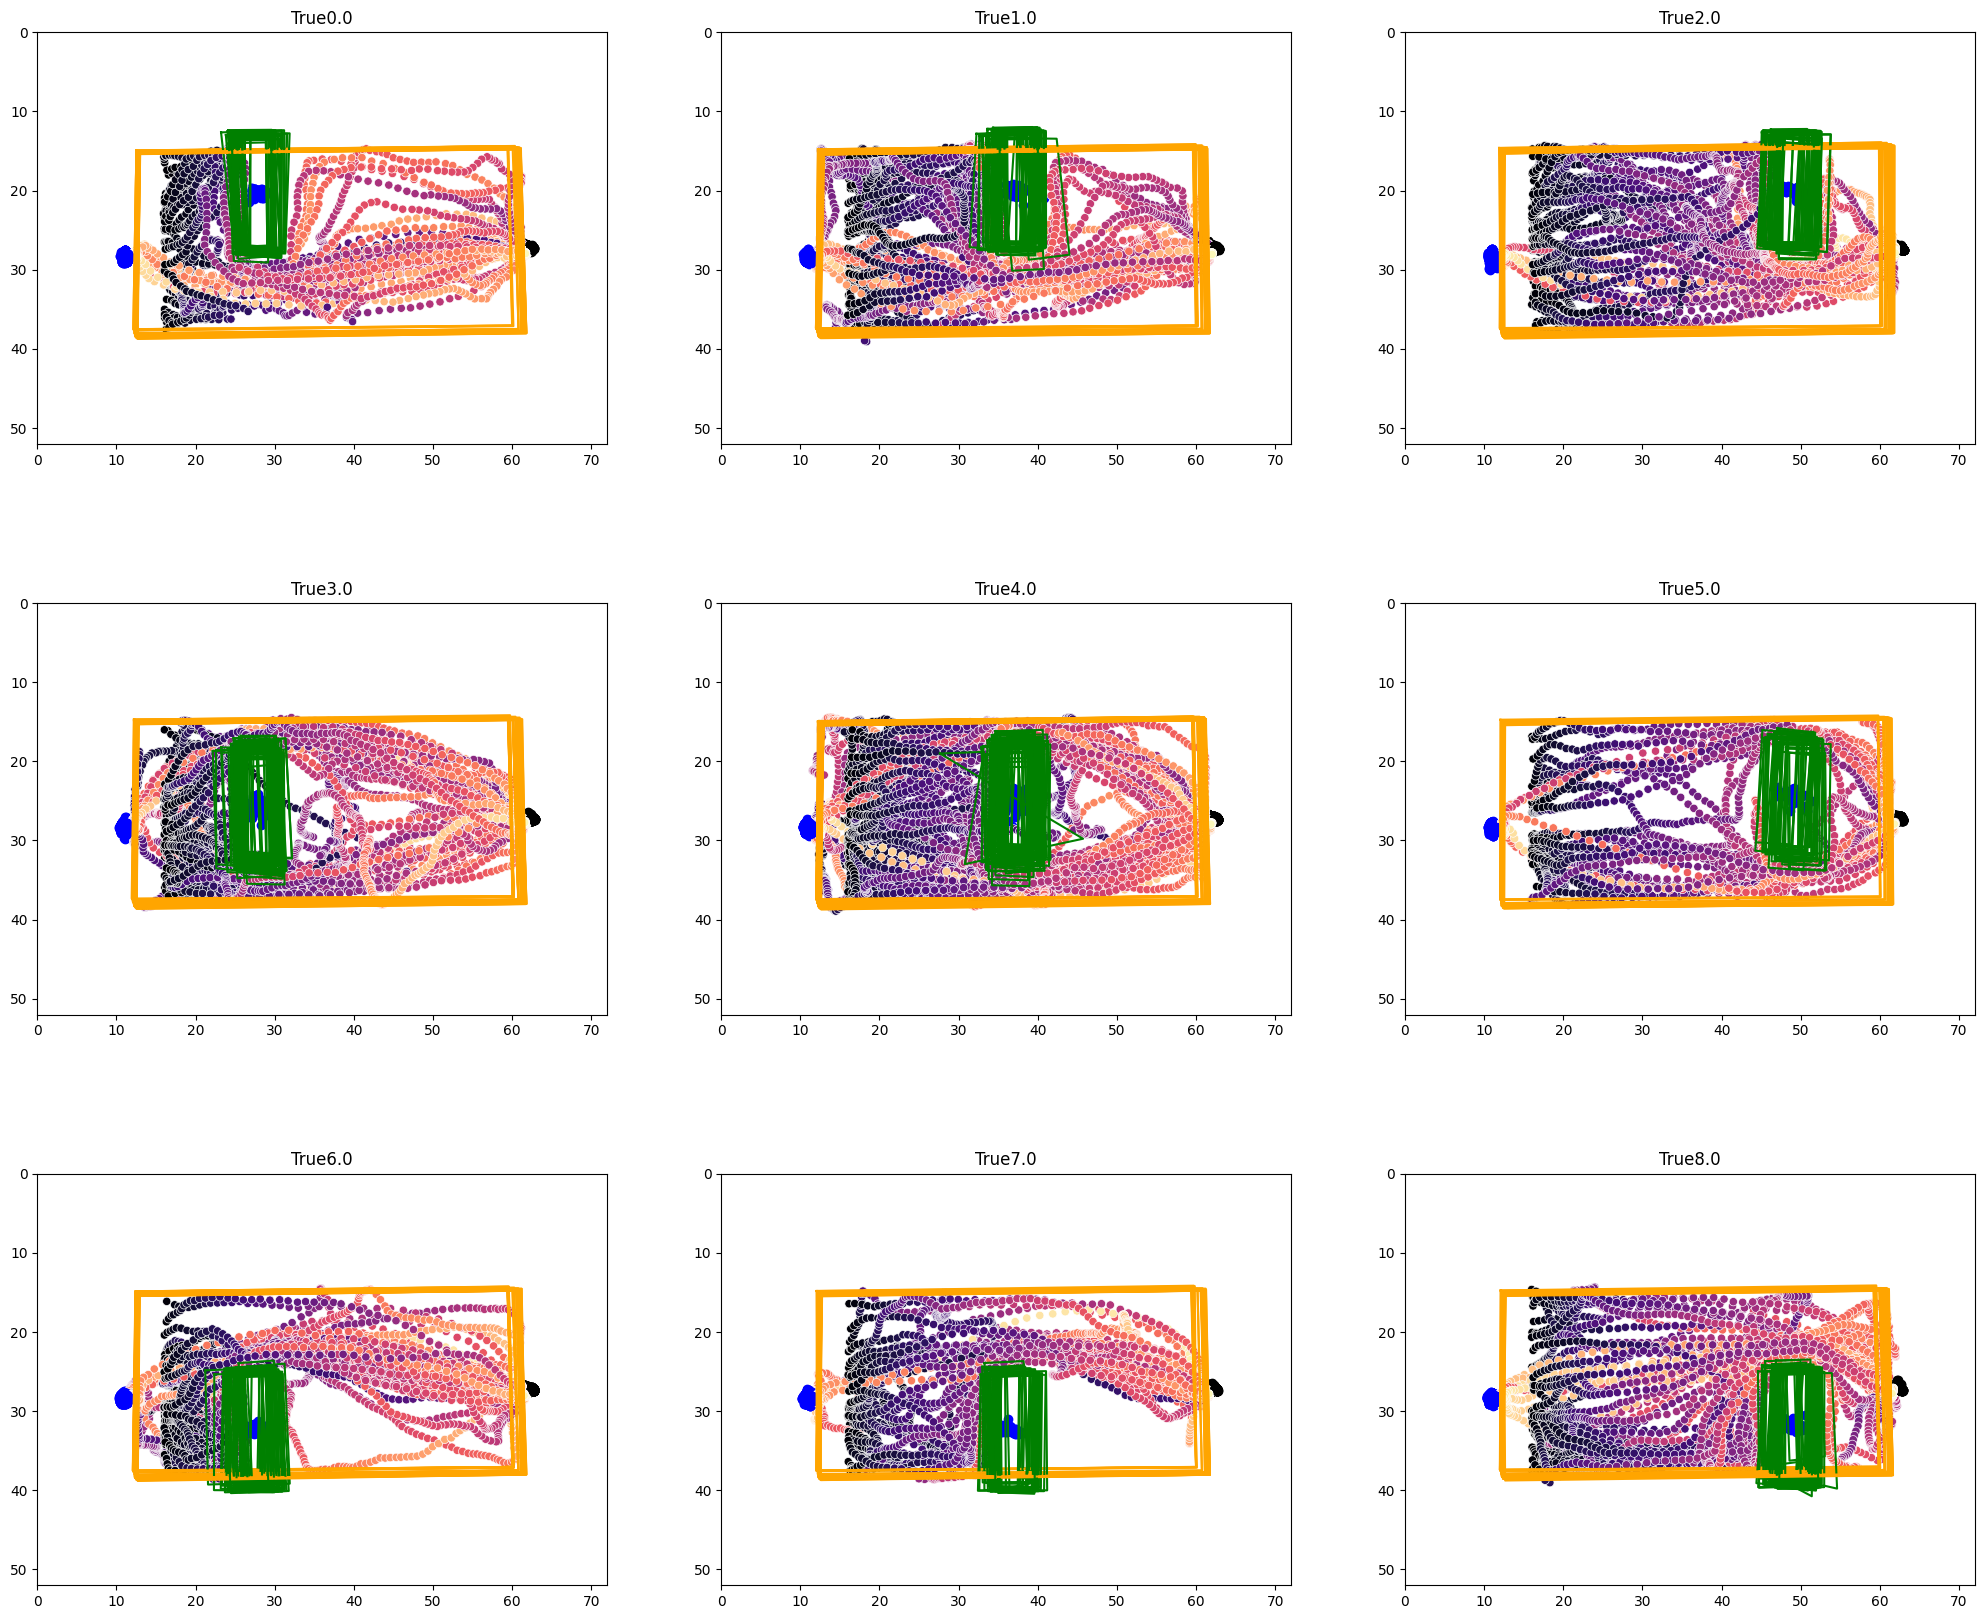

In [203]:
plt.subplots(3,3, figsize=(25,21))


for clusters, cluster_name in enumerate(df1['cluster_label'].unique()):
    x=df1.loc[df1['cluster_label']==cluster_name]
    for i, row in x.iterrows():
        if row['odd'] == True:
            plt.subplot(3,3,int(cluster_name)+1)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_title(str(row['odd'])+str(row['cluster_label']))
    
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')


            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    
   
    
    
            plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
            #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
            plt.ylim([52,0]); plt.xlim([0, 72])

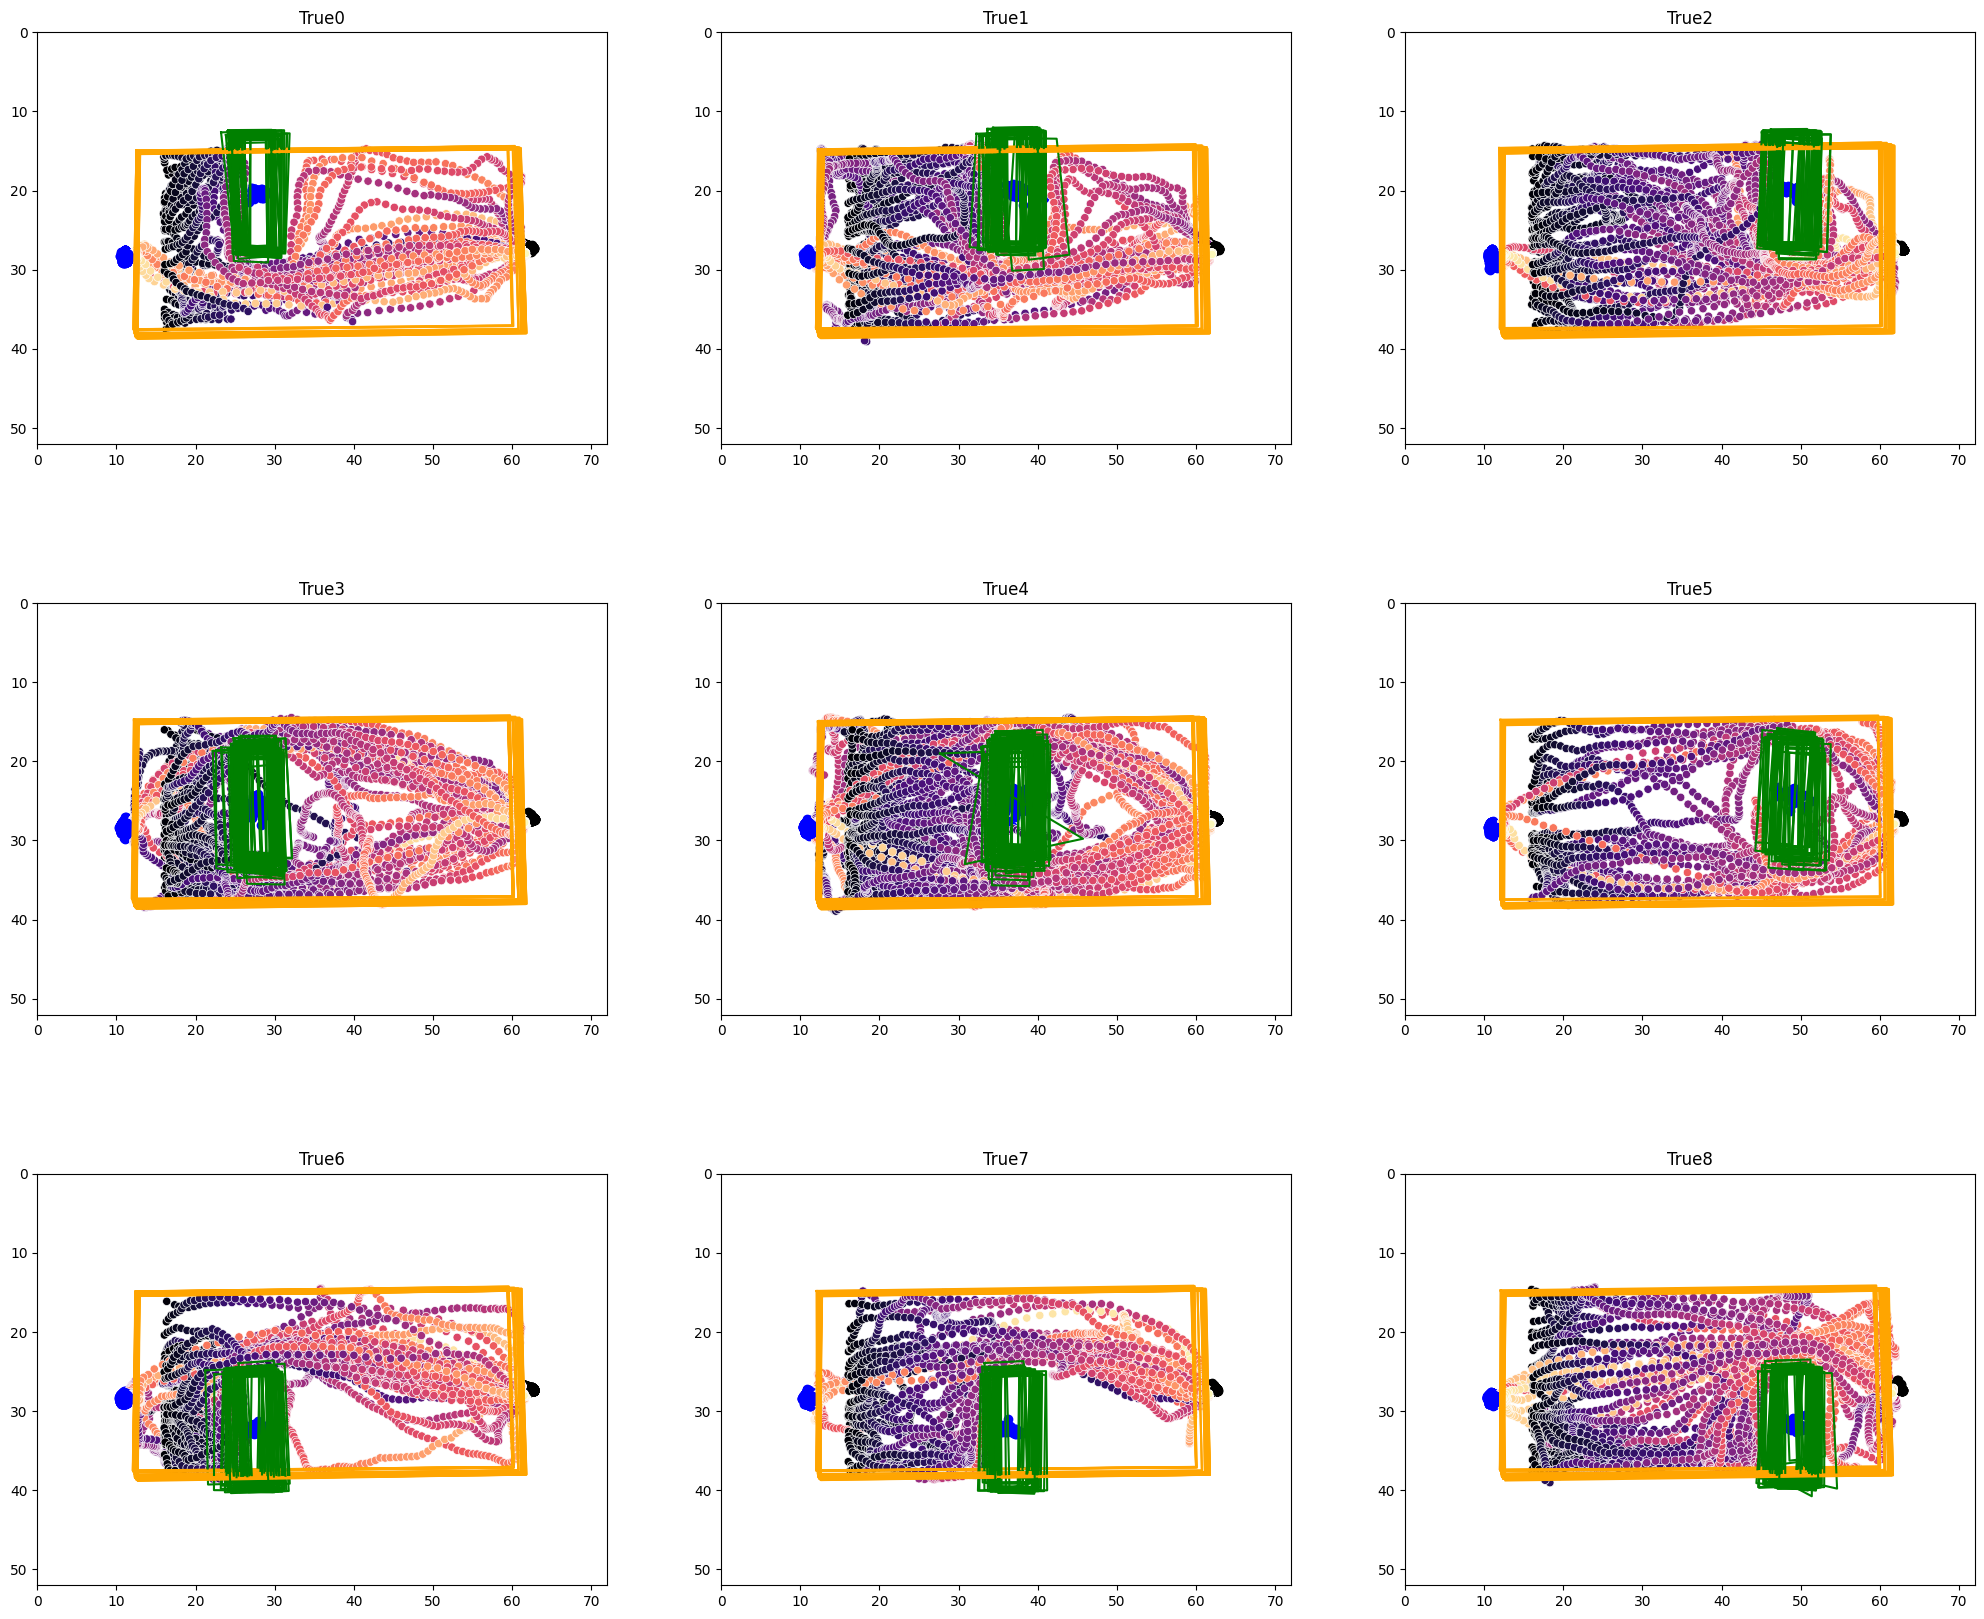

In [227]:
plt.subplots(3,3, figsize=(25,21))


for clusters, cluster_name in enumerate(df['cluster_label'].unique()):
    x=df.loc[df['cluster_label']==cluster_name]
    for i, row in x.iterrows():
        if row['odd'] == True:
            plt.subplot(3,3,int(cluster_name)+1)
            plt.gca().set_aspect('equal', adjustable='box')
            plt.gca().set_title(str(row['odd'])+str(row['cluster_label']))
    
            plt.plot([row['arenaTL_x_cm'], row['arenaTR_x_cm'], row['arenaBR_x_cm'], row['arenaBL_x_cm'],row['arenaTL_x_cm']],
                [row['arenaTL_y_cm'], row['arenaTR_y_cm'], row['arenaBR_y_cm'], row['arenaBL_y_cm'],row['arenaTL_y_cm']],color='orange')


            plt.plot([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBR_x_cm'], row['gt_obstacleBL_x_cm'],row['gt_obstacleTL_x_cm']],
                [row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBR_y_cm'], row['gt_obstacleBL_y_cm'],row['gt_obstacleTL_y_cm']],color='green')
    
   
    
    
            plt.scatter(row['gt_obstacle_cen_x_cm'],row['gt_obstacle_cen_y_cm'],color='blue')
            plt.scatter(row['leftportT_x_cm'],row['leftportT_y_cm'],color='blue')
            plt.scatter(row['rightportT_x_cm'],row['rightportT_y_cm'],color='black')
            sns.scatterplot(x=row['ts_nose_x_cm'],y=row['ts_nose_y_cm'],hue = enumerate(row['ts_nose_x_cm']), palette ='magma',legend=False) 
            #plt.scatter(row['wobstacle_x_cm'], row['wobstacle_y_cm'], c = list(mcolors.TABLEAU_COLORS)[ row['obstacle_cluster']])
            plt.ylim([52,0]); plt.xlim([0, 72])

In [210]:
df1.to_hdf('D:/obstacle_avoidance/recordings/data_h5/101222_101322_101422.h5','w')


In [229]:
df.groupby(['animal']).count()

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,obstacle_cluster,mean_gt_obstacle_cen_x_cm,mean_gt_obstacle_cen_y_cm,cluster_label,body_angle,head_angle,obstacle_edge_mid_x_cm,obstacle_edge_mid_y_cm,obstacle_intersect_spine_x,obstacle_intersect_spine_y
animal,,,,,,,,,,,,,,,,,,,,,
J19LT,321,321,321,321,321,321,321,321,321,321,...,321,321,321,321,321,321,321,321,321,321
J19RT,171,171,171,171,171,171,171,171,171,171,...,171,171,171,171,171,171,171,171,171,171
J20LT,283,283,283,283,283,283,283,283,283,283,...,283,283,283,283,283,283,283,283,283,283
J20RT,239,239,239,239,239,239,239,239,239,239,...,239,239,239,239,239,239,239,239,239,239


In [352]:
test = pd.read_hdf(r'D:\obstacle_avoidance\recordings\101422\J19RT\oa\df_J19RT_101422_oa.h5')

In [235]:
test['odd'] = np.nan
for i, ind in enumerate(test.index.values):
    if ind%2 == 0: # odd values
        test.at[ind, 'odd'] = True
    elif ind%2 == 1:
        test.at[ind, 'odd'] = False

In [ ]:
dist_to_posts = np.median(self.data['arenaTR_x'].iloc[0],0) - np.median(self.data['arenaTL_x'].iloc[0],0)
pxls2cm = dist_to_posts/self.dist_across_arena
self.convert_pxls_to_dist()

In [345]:
keys = ['nose','leftear','rightear','spine','midspine','tailbase']
keys_list = list_columns(test,keys)
keys_list= [col for col in keys_list if 'likelihood' not in col]
keys_list= [col for col in keys_list if 'lind' not in col]
# check if odd or even trial
#  get first index when nose crosses a distance thresh hold
#trail start = ts
##odd tiral at 16 cm even at 56 cm     
for ind, row in test.iterrows(): 
    if row['odd'] == True:
        nose_list = row['nose_x_cm'] 
        odd_ind = np.argmax(nose_list>16)
        for key in keys_list:
            test.at[ind,'ts_' + key] = row[key][odd_ind:]
    else: 
        nose_list = row['nose_x_cm']
        even_ind = np.argmax(nose_list<56)
        for key in keys_list:
            test.at[ind,'ts_' + key] = row[key][even_ind:]

In [347]:
np.nan

nan

In [353]:
obstacle_cols = list_columns(test,['obstacle'])
obstacle_cols = [col for col in obstacle_cols if 'likelihood' not in col]
for ind, row in test.iterrows():
    nose_list = row['nose_x_cm']
    middle_time = np.where((nose_list > 30) & (nose_list < 50))
    if len(middle_time[0]) == 0:
        test = test.drop(ind)
        #for col in obstacle_cols:
            #test.at[ind,'gt_'+ col]= np.nan
    else:
        first,last = [middle_time[0][i] for i in (0, -1)] 
    # calculate median of each corner
        for col in obstacle_cols:
            test.at[ind,'gt_'+ col]= np.nanmedian(row[col][first:last])


In [355]:
for ind, row in test.iterrows():
    xvals = np.stack([row['gt_obstacleTL_x'], row['gt_obstacleTR_x'], row['gt_obstacleBL_x'], row['gt_obstacleBR_x']])
    xvals_cm = np.stack([row['gt_obstacleTL_x_cm'], row['gt_obstacleTR_x_cm'], row['gt_obstacleBL_x_cm'], row['gt_obstacleBR_x_cm']])
    test.at[ind,'gt_obstacle_cen_x' ] = np.mean(xvals)
    test.at[ind,'gt_obstacle_cen_x_cm' ] = np.mean(xvals_cm)
    yvals = np.stack([row['gt_obstacleTL_y'], row['gt_obstacleTR_y'], row['gt_obstacleBL_y'], row['gt_obstacleBR_y']])
    yvals_cm = np.stack([row['gt_obstacleTL_y_cm'], row['gt_obstacleTR_y_cm'], row['gt_obstacleBL_y_cm'], row['gt_obstacleBR_y_cm']])
    test.at[ind,'gt_obstacle_cen_y' ] = np.mean(yvals)
    test.at[ind,'gt_obstacle_cen_y_cm' ] = np.mean(yvals_cm)

In [356]:
test

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,gt_obstacleTR_x_cm,gt_obstacleTR_y_cm,gt_obstacleBR_x_cm,gt_obstacleBR_y_cm,gt_obstacleBL_x_cm,gt_obstacleBL_y_cm,gt_obstacle_cen_x,gt_obstacle_cen_x_cm,gt_obstacle_cen_y,gt_obstacle_cen_y_cm
0,52425.162777,52432.724736,"[52425.173977, 52425.191052, 52425.207961, 524...","[537, 538, 539, 540, 541, 542, 543, 544, 545, ...","[110.8334732055664, 110.70110321044922, 111.07...","[265.7688293457031, 265.6741638183594, 266.196...","[0.9999991655349731, 0.9999995231628418, 0.999...","[131.16197204589844, 131.34767150878906, 131.7...","[258.6773681640625, 258.6484069824219, 258.360...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,38.509678,25.248591,38.031984,40.043272,33.281933,39.929939,333.632683,35.895197,303.450264,32.647902
1,52432.724736,52437.689369,"[52432.726412, 52432.742886, 52432.76014, 5243...","[[990, 991, 992, 993, 994, 995, 996, 997, 998,...","[571.219482421875, 571.1056518554688, 571.0468...","[256.6325378417969, 256.460205078125, 256.6684...","[0.999998927116394, 0.9999988079071045, 0.9999...","[558.0394287109375, 558.269287109375, 558.0075...","[247.71429443359375, 247.74465942382812, 247.7...","[0.9999990463256836, 0.9999990463256836, 0.999...",...,38.475413,24.927512,38.051980,40.015447,33.299659,39.930673,332.879318,35.814144,301.619503,32.450932
4,52448.200614,52457.077350,"[52448.21518, 52448.231846, 52448.248665, 5244...","[1919, 1920, 1921, 1922, 1923, 1924, 1925, 192...","[112.93028259277344, 113.25072479248047, 113.8...","[265.36004638671875, 265.0715026855469, 264.77...","[0.9999995231628418, 0.9999995231628418, 0.999...","[132.05014038085938, 132.34872436523438, 133.1...","[257.2498779296875, 257.0514221191406, 256.382...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...",...,38.451697,25.103837,38.058844,39.996378,33.310699,39.997596,333.149208,35.843181,302.903622,32.589089
6,52461.853657,52472.229836,"[52461.870144, 52461.886528, 52461.903782, 524...","[2738, 2739, 2740, 2741, 2742, 2743, 2744, 274...","[572.0171508789062, 572.1575927734375, 572.112...","[257.9628601074219, 257.9485168457031, 257.324...","[0.9999994039535522, 0.9999992847442627, 0.999...","[556.0795288085938, 556.2659301757812, 555.672...","[250.12362670898438, 250.5100555419922, 250.33...","[0.9999990463256836, 0.9999990463256836, 0.999...",...,38.483083,25.012900,38.016357,40.051374,33.276334,39.928534,332.708801,35.795798,301.949297,32.486415
7,52472.229836,52487.759052,"[52472.240384, 52472.256908, 52472.273484, 524...","[[3360, 3361, 3362, 3363, 3364, 3365, 3366, 33...","[571.8156127929688, 571.577392578125, 571.4645...","[257.1131591796875, 256.7197570800781, 256.646...","[0.9999996423721313, 0.9999992847442627, 0.999...","[556.8327026367188, 556.6375122070312, 556.521...","[249.26437377929688, 249.11361694335938, 249.0...","[0.9999983310699463, 0.9999980926513672, 0.999...",...,38.473285,24.889690,38.022999,40.047926,33.273876,39.932878,332.727180,35.797775,301.669445,32.456306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,53348.094361,53351.633651,"[53348.110195, 53348.126604, 53348.143872, 533...","[55894, 55895, 55896, 55897, 55898, 55899, 559...","[111.79701232910156, 111.55461120605469, 111.7...","[262.4882507324219, 262.8789978027344, 262.647...","[0.9999998807907104, 0.9999998807907104, 0.999...","[125.82678985595703, 125.91278839111328, 126.0...","[272.10919189453125, 272.0788269042969, 272.20...","[1.0, 0.9999998807907104, 0.9999998807907104, ...",...,40.045495,17.862284,39.616865,32.711350,34.889137,32.427885,348.105400,37.452302,234.364725,25.215060
185,53351.633651,53355.693209,"[53351.644864, 53351.661196, 53351.677849, 533...","[[56106, 56107, 56108, 56109, 56110, 56111, 56...","[571.26123046875, 571.5488891601562, 571.43859...","[257.1657409667969, 257.45574951171875, 257.14...","[0.9999986886978149, 0.999998927116394, 0.9999...

In [334]:
middle_time

(array([239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255, 256, 257, 258, 259], dtype=int64),)

In [325]:
len(middle_time[0])

0

In [308]:
np.where((nose_list > 30) & (nose_list < 50))

(array([], dtype=int64),)

In [337]:
test.at[1,'nose_x_cm']

array([61.456917096122986, 61.444670182462104, 61.438339874274924,
       61.442936571091344, 61.430978592658924, 61.431838831634565,
       61.40332617795331, 61.43669163013075, 61.42584999235375,
       61.427708371209526, 61.44679779641713, 61.51432983936002,
       61.38452568797417, 61.33121713832321, 61.33536073216772,
       61.34209817635864, 61.51910383733936, 61.45699589663984,
       61.469361011075996, 61.365022560053085, 61.46418644380266,
       61.45623415831026, 61.438602542664434, 61.50425650662233,
       61.34373328708334, 61.3419865422931, 61.40940038446072,
       61.42624399493801, 61.44419081265125, 61.45974734801995,
       61.42961928374321, 61.42273737193806, 61.41580292645501,
       61.442286466827305, 61.46312263682515, 61.48979661177984,
       61.43696086523, 61.44095999146028, 61.423939079820066,
       61.42401131362718, 61.47068748644302, 61.43325067422818,
       61.43445894881992, 61.44030332048651, 61.46703639582884,
       61.440815523846055, 61.45

In [342]:
test.at[7,'nose_x_cm']

array([61.52105415013147, 61.49542428202508, 61.483289002429736,
       61.51607658415026, 61.524317804871124, 61.47747746431184,
       61.423078840844425, 61.463306504697805, 61.56194505166836,
       61.52528967791231, 61.44803233784783, 61.46185526184576,
       61.4213517961834, 61.354837593249854, 61.34754197873123,
       61.36748507620474, 61.30936969502576, 61.30757041655762,
       61.31839892091515, 61.299729765130756, 61.301016840239356,
       61.28247245193999, 61.21572841416562, 61.227358057111154,
       61.15861773957651, 61.24049147658663, 61.25445230148906,
       61.22949880448566, 61.15254353306911, 61.14276570226962,
       61.09407354956429, 60.98595267373244, 60.96620001084133,
       60.98045633768196, 60.94215271978173, 60.90008637720179,
       60.74453415693426, 60.52463474794664, 60.421885440680256,
       60.271737622526885, 60.1816029646667, 60.02806015757892,
       59.97191478932127, 59.87536445604731, 59.73245971873466,
       59.717737155502654, 59.56

In [292]:
np.where((nose_list > 30) & (nose_list < 50))

(array([], dtype=int64),)

In [295]:
np.where((nose_list > 30) & (nose_list < 50))

(array([239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255, 256, 257, 258, 259], dtype=int64),)

In [296]:
first,last = [middle_time[0][i] for i in (0, -1)] 

In [297]:
first,last 

(239, 259)

In [284]:
test

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,ts_midspine_x_cm,ts_midspine_y_cm,ts_interp_spine_y_cm,ts_interp_spine_x_cm,ts_interp_midspine_y_cm,ts_interp_midspine_x_cm,ts_tailbase_x,ts_tailbase_y,ts_tailbase_x_cm,ts_tailbase_y_cm
0,52425.162777,52432.724736,"[52425.173977, 52425.191052, 52425.207961, 524...","[537, 538, 539, 540, 541, 542, 543, 544, 545, ...","[110.8334732055664, 110.70110321044922, 111.07...","[265.7688293457031, 265.6741638183594, 266.196...","[0.9999991655349731, 0.9999995231628418, 0.999...","[131.16197204589844, 131.34767150878906, 131.7...","[258.6773681640625, 258.6484069824219, 258.360...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[14.27520941447921, 14.299744283736832, 14.369...","[28.43090142837673, 28.77840842434293, 29.0991...","[26.761016032293046, 26.738351545110635, 26.76...","[58.60711735821341, 58.60061951643156, 58.5941...","[26.04662799448386, 26.01761819302757, 26.0044...","[57.197779683877165, 57.15400454482958, 57.146...","[132.4005126953125, 131.03939819335938, 131.22...","[246.8468475341797, 249.66452026367188, 252.93...","[14.244835098587306, 14.098394188080887, 14.11...","[26.557998652334543, 26.861149165699764, 27.21..."
1,52432.724736,52437.689369,"[52432.726412, 52432.742886, 52432.76014, 5243...","[[990, 991, 992, 993, 994, 995, 996, 997, 998,...","[571.219482421875, 571.1056518554688, 571.0468...","[256.6325378417969, 256.460205078125, 256.6684...","[0.999998927116394, 0.9999988079071045, 0.9999...","[558.0394287109375, 558.269287109375, 558.0075...","[247.71429443359375, 247.74465942382812, 247.7...","[0.9999990463256836, 0.9999990463256836, 0.999...",...,"[59.02204022575752, 58.65687863066141, 58.3583...","[22.460063140628602, 22.229624162511914, 21.75...",[],[],[],[],"[561.0142211914062, 560.17724609375, 558.42016...","[226.4611358642578, 224.4815673828125, 221.135...","[60.35894352784404, 60.268894237210446, 60.079...","[24.364720883285052, 24.151741144683573, 23.79..."
2,52437.689369,52444.984921,"[52437.694886, 52437.7115, 52437.72864, 52437....","[1288, 1289, 1290, 1291, 1292, 1293, 1294, 129...","[111.96903228759766, 111.82127380371094, 111.6...","[264.164306640625, 264.86199951171875, 264.698...","[0.9999998807907104, 0.9999997615814209, 0.999...","[132.36961364746094, 131.99415588378906, 131.8...","[258.681396484375, 259.12103271484375, 259.224...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,"[14.612121024283576, 14.625888131248743, 14.64...","[24.9110891919166, 24.94804335096572, 24.95102...","[26.680321679651684, 26.702919245792145, 26.69...","[14.169795664736743, 14.153191582421801, 14.20...","[24.9110891919166, 24.9570166113289, 24.960972...","[14.612121024283576, 14.645297163829035, 14.68...","[139.1322021484375, 138.98265075683594, 139.21...","[213.51596069335938, 213.7509765625, 213.89100...","[14.969090648981862, 14.953000568446969, 14.97...","[22.971962789846767, 22.997247905691925, 23.01..."
3,52444.984921,52448.200614,"[52444.997926, 52445.014297, 52445.030745, 524...","[[1726, 1727, 1728, 1729, 1730, 1731, 1732, 17...","[132.21762084960938, 131.6810302734375, nan, n...","[238.72171020507812, 237.40289306640625, nan, ...","[0.9970894455909729, 0.9953061938285828, 0.890...","[140.77035522460938, 140.71902465820312, 139.1...","[222.5398712158203, 222.52464294433594, 221.27...","[0.9999903440475464, 0.9999887943267822, 0.999...",...,"[14.501902084690519, 14.56932577692274, 14.588...","[22.245776626789315, 22.285316427797667, 22.56...","[23.435378779393776, 23.463419091953497, 23.55...","[14.687505210395368, 14.673352795961597, 14.75...","[22.245776626789315, 22.283925580526017, 22.54...","[14.501902084690519, 14.56695408925628, 14.587...","[133.0915985107422, 133.8304901123047, 133.553...","[199.1160125732422, 198.80535888671875, 199.57...","[14.319188311270274, 14.398684899355326, 14.36...","[21.422687169809503, 21.389264258921855, 21.47..."
4,52448.

In [272]:
nose_list = test_row['nose_x_cm']
middle_time = np.where((nose_list > 30) & (nose_list < 50))
first,last = [middle_time[0][i] for i in (0, -1)]

In [276]:
np.nanmedian(test_row[col][first:last])

313.76072692871094

In [257]:
ind

0

In [256]:
row['obstacleTL_x']

array([310.4743957519531, 310.40960693359375, 310.54754638671875,
       309.7984313964844, 310.4886169433594, 310.4574890136719,
       310.5117492675781, 310.2606506347656, 310.430908203125,
       310.45343017578125, 309.7342224121094, 310.0736389160156,
       310.73419189453125, 310.3852233886719, 310.53314208984375,
       310.3928527832031, 310.2068176269531, 310.368896484375,
       310.2107238769531, 310.7314147949219, 310.3224182128906,
       310.7054443359375, 310.1600036621094, 310.6995544433594,
       310.0898132324219, 310.53717041015625, 310.7741394042969,
       309.9232177734375, 309.9439697265625, 310.2567443847656,
       310.3833923339844, 310.5000915527344, 310.3244934082031,
       310.2647399902344, 310.78558349609375, 310.81231689453125,
       310.3246765136719, 310.38983154296875, 310.4963073730469,
       310.899169921875, 310.5140686035156, 310.5558776855469,
       310.6544189453125, 310.3848876953125, 310.4185485839844,
       310.258056640625, 310.23788

In [255]:
test

,first_poke,second_poke,trial_timestamps,trial_vidframes,nose_x,nose_y,nose_likelihood,leftear_x,leftear_y,leftear_likelihood,...,gt_obstacleBL_x,gt_obstacleBL_y,gt_obstacleTL_x_cm,gt_obstacleTL_y_cm,gt_obstacleTR_x_cm,gt_obstacleTR_y_cm,gt_obstacleBR_x_cm,gt_obstacleBR_y_cm,gt_obstacleBL_x_cm,gt_obstacleBL_y_cm
0,52425.162777,52432.724736,"[52425.173977, 52425.191052, 52425.207961, 524...","[537, 538, 539, 540, 541, 542, 543, 544, 545, ...","[110.8334732055664, 110.70110321044922, 111.07...","[265.7688293457031, 265.6741638183594, 266.196...","[0.9999991655349731, 0.9999995231628418, 0.999...","[131.16197204589844, 131.34767150878906, 131.7...","[258.6773681640625, 258.6484069824219, 258.360...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,309.343353,371.134125,33.757194,25.369806,38.509678,25.248591,38.031984,40.043272,33.281933,39.929939
1,52432.724736,52437.689369,"[52432.726412, 52432.742886, 52432.76014, 5243...","[[990, 991, 992, 993, 994, 995, 996, 997, 998,...","[571.219482421875, 571.1056518554688, 571.0468...","[256.6325378417969, 256.460205078125, 256.6684...","[0.999998927116394, 0.9999988079071045, 0.9999...","[558.0394287109375, 558.269287109375, 558.0075...","[247.71429443359375, 247.74465942382812, 247.7...","[0.9999990463256836, 0.9999990463256836, 0.999...",...,309.508102,371.140945,33.429524,24.930097,38.475413,24.927512,38.051980,40.015447,33.299659,39.930673
2,52437.689369,52444.984921,"[52437.694886, 52437.7115, 52437.72864, 52437....","[1288, 1289, 1290, 1291, 1292, 1293, 1294, 129...","[111.96903228759766, 111.82127380371094, 111.6...","[264.164306640625, 264.86199951171875, 264.698...","[0.9999998807907104, 0.9999997615814209, 0.999...","[132.36961364746094, 131.99415588378906, 131.8...","[258.681396484375, 259.12103271484375, 259.224...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52444.984921,52448.200614,"[52444.997926, 52445.014297, 52445.030745, 524...","[[1726, 1727, 1728, 1729, 1730, 1731, 1732, 17...","[132.21762084960938, 131.6810302734375, nan, n...","[238.72171020507812, 237.40289306640625, nan, ...","[0.9970894455909729, 0.9953061938285828, 0.890...","[140.77035522460938, 140.71902465820312, 139.1...","[222.5398712158203, 222.52464294433594, 221.27...","[0.9999903440475464, 0.9999887943267822, 0.999...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,52448.200614,52457.077350,"[52448.21518, 52448.231846, 52448.248665, 5244...","[1919, 1920, 1921, 1922, 1923, 1924, 1925, 192...","[112.93028259277344, 113.25072479248047, 113.8...","[265.36004638671875, 265.0715026855469, 264.77...","[0.9999995231628418, 0.9999995231628418, 0.999...","[132.05014038085938, 132.34872436523438, 133.1...","[257.2498779296875, 257.0514221191406, 256.382...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,53348.094361,53351.633651,"[53348.110195, 53348.126604, 53348.143872, 533...","[55894, 55895, 55896, 55897, 55898, 55899, 559...","[111.79701232910156, 111.55461120605469, 111.7...","[262.4882507324219, 262.8789978027344, 262.647...","[0.9999998807907104, 0.9999998807907104, 0.999...","[125.82678985595703, 125.91278839111328, 126.0...","[272.10919189453125, 272.0788269042969, 272.20...","[1.0, 0.9999998807907104, 0.9999998807907104, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,53351.633651,53355.693209,"[53351.644864, 53351.661196, 53351.677849, 533...","[[56106, 56107, 56108, 56109, 56110, 56111, 56...","[571.26123046875, 571.5488891601562, 571.43859...","[257.1657409667969, 257.45574951171875, 257.14...","[0.9999986886978149, 0.999998927116394, 0.9999...","[558.2796630859375, 558.4724731445312, 558.000...","[248.4856719970703, 248.68582153320312, 248.23...","[0.9999980926513672, 0.9999978542327881, 0.999...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,53355.693209,53360.752192,"[53355.695808, 53355.71